# Hyggebike
Planning the most hyggelige bike paths in Copenhagen.

In [99]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as cx
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import ListedColormap

## Data loading

In [2]:
geocodes = ['Københavns Kommune', 'Frederiksberg Kommune']
city = ox.geocode_to_gdf(geocodes)

/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


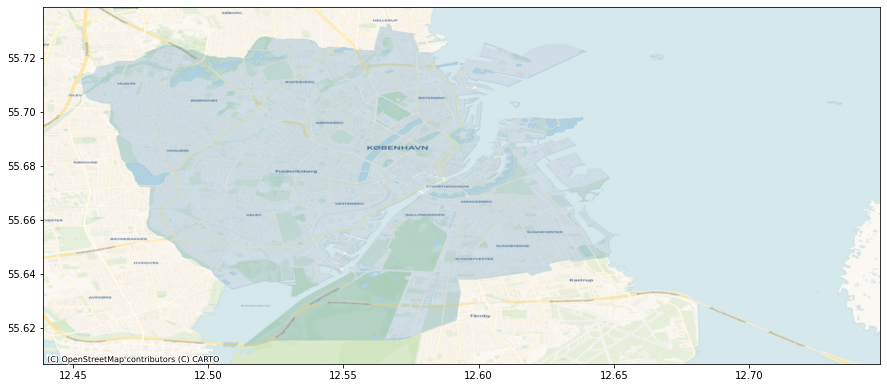

In [3]:
f, ax = plt.subplots(figsize=(15,15))
city.plot(ax=ax, alpha=.2)
cx.add_basemap(ax=ax, crs=city.crs, source=cx.providers.CartoDB.Voyager)

In [4]:
G = ox.graph_from_place(geocodes, network_type='bike')

/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/conda/lib/python3.9/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


## Betweenness centrality

In [5]:
betweenness = nx.edge_betweenness_centrality(G, weight='length', k=100)

In [6]:
nx.set_edge_attributes(G, betweenness, "betweenness")

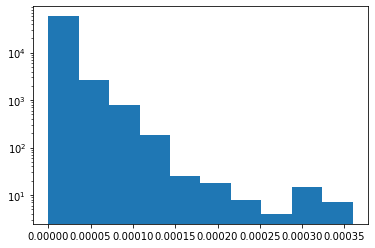

In [7]:
f, ax = plt.subplots()
ax.hist(betweenness.values())
ax.set_yscale('log')

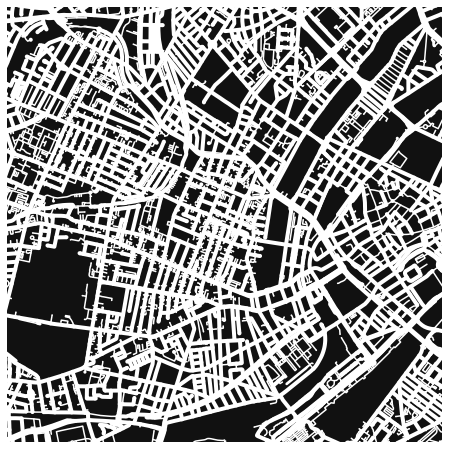

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
ox.plot.plot_figure_ground(G, dist=2000)

In [95]:
#ec = ox.plot.get_edge_colors_by_attr(G, 'betweenness', num_bins=5)

b = np.array(list(betweenness.values()))
q = np.linspace(0, 1, 4)
quantiles = np.argmin(np.abs(b.reshape(-1, 1) - np.quantile(b, q)), axis=1)

colors = ['#627254', '#76885B', '#DDDDDD', '#EEEEEE']
cmap = ListedColormap(colors)
ec = cmap(quantiles)

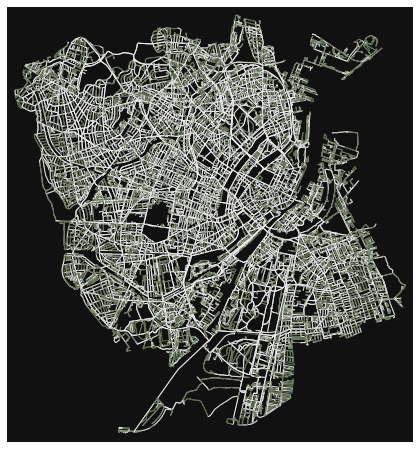

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [135]:
ox.plot.plot_graph(G, edge_color=ec, node_color='#00000000')

## Dumping data

In [44]:
nodes, edges = ox.graph_to_gdfs(G)

In [46]:
with open('data/nodes.json', 'w') as f:
    f.write(nodes.to_json(show_bbox=True))

In [47]:
with open('data/edges.json', 'w') as f:
    f.write(edges.to_json(show_bbox=True))